In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm import tqdm_notebook
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc")

## 匯入資料

In [2]:
df = pd.read_csv("./ml-20m/ratings.csv")

In [4]:
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
# 總資料量
len(df)

20000263

In [11]:
# 使用者數量
len(df['userId'].value_counts())

138493

In [57]:
# 無空值
df.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [56]:
# 無異常值
df[df['rating'] < 0]

,userId,movieId,rating,timestamp


In [3]:
# 轉換日期
df['date'] = pd.to_datetime(df['timestamp'],unit='s')
df.head()

,userId,movieId,rating,timestamp,date
0,1,2,3.5,1112486027,2005-04-02 23:53:47
1,1,29,3.5,1112484676,2005-04-02 23:31:16
2,1,32,3.5,1112484819,2005-04-02 23:33:39
3,1,47,3.5,1112484727,2005-04-02 23:32:07
4,1,50,3.5,1112484580,2005-04-02 23:29:40


### 評分分數分佈

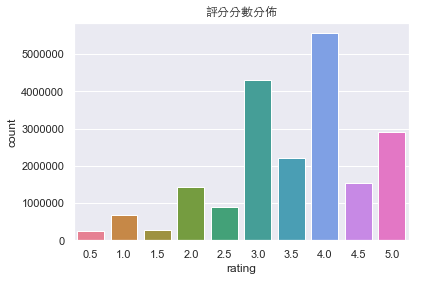

In [3]:
sns.countplot(data=df, x='rating', palette='husl')
plt.title("評分分數分佈", fontproperties=font,size=12)
plt.show()

### 平均分數分佈

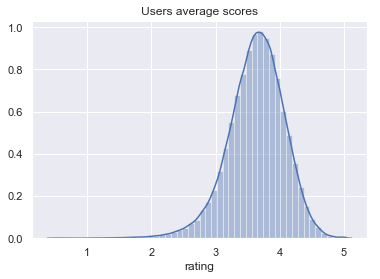

In [4]:
rating_mean = df.groupby('userId')['rating'].mean()
sns.distplot(rating_mean)
plt.title('Users average scores')
plt.show()

In [25]:
# 平均給分 < 2
len(rating_mean[rating_mean < 2])

492

In [26]:
rating_mean[rating_mean < 2].head()

userId
404     1.650000
809     1.806931
874     1.925000
957     1.420455
1245    1.590909
Name: rating, dtype: float64

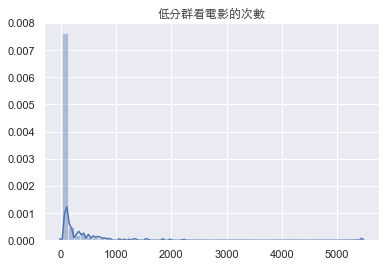

In [5]:
badscore_watch = []
badscore_user = rating_mean[rating_mean < 2].keys()
for i in tqdm_notebook(badscore_user):
    badscore_watch.append(len(df[df['userId']==i]))
sns.distplot(badscore_watch)
plt.title('低分群評分電影的次數', fontproperties=font,size=12)
plt.show()

In [63]:
for i in list(zip(badscore_user, badscore_watch)):
    if i[1] > 1000:
        print(i)

(9175, 1346)
(20204, 1060)
(35609, 1343)
(37253, 1985)
(45815, 1574)
(50168, 1843)
(60887, 2216)
(68060, 1256)
(74142, 5447)
(77156, 1137)
(116900, 1538)


In [9]:
df_movie = pd.read_csv("./ml-20m/movies.csv")
df_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [91]:
df[df['userId']==74200].sort_values("date")

,userId,movieId,rating,timestamp,date
10729931,74200,2018,4.0,1280988555,2010-08-05 06:09:15
10729933,74200,2116,3.0,1280988597,2010-08-05 06:09:57
10729935,74200,3254,3.0,1280988612,2010-08-05 06:10:12
10729946,74200,68954,5.0,1280988689,2010-08-05 06:11:29
10729937,74200,4054,4.0,1280988699,2010-08-05 06:11:39
10729928,74200,609,3.5,1280988708,2010-08-05 06:11:48
10729934,74200,2633,3.5,1280988785,2010-08-05 06:13:05
10729950,74200,73017,2.5,1280988800,2010-08-05 06:13:20
10729932,74200,2092,4.0,1280988809,2010-08-05 06:13:29
10729938,74200,4368,3.5,1280988821,2010-08-05 06:13:41


In [15]:
pd.merge(df[df['userId']==9175].sort_values("date"), df_movie, on=['movieId'])

,userId,movieId,rating,timestamp,date,title,genres
0,9175,3113,3.0,944050031,1999-12-01 12:07:11,End of Days (1999),Action|Fantasy|Horror|Mystery|Thriller
1,9175,1198,5.0,944050082,1999-12-01 12:08:02,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
2,9175,6,2.0,944050082,1999-12-01 12:08:02,Heat (1995),Action|Crime|Thriller
3,9175,260,4.0,944050082,1999-12-01 12:08:02,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
4,9175,1221,5.0,944050082,1999-12-01 12:08:02,"Godfather: Part II, The (1974)",Crime|Drama
5,9175,555,3.0,944050082,1999-12-01 12:08:02,True Romance (1993),Crime|Thriller
6,9175,858,5.0,944050082,1999-12-01 12:08:02,"Godfather, The (1972)",Crime|Drama
7,9175,2985,3.0,944050124,1999-12-01 12:08:44,RoboCop (1987),Action|Crime|Drama|Sci-Fi|Thriller
8,9175,1196,4.0,944050124,1999-12-01 12:08:44,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
9,9175,2916,3.0,944050124,1999-12-01 12:08:44,Total Recall (1990),Action|Adventure|Sci-Fi|Thriller
